In [19]:
import warnings
warnings.filterwarnings(action = "ignore")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
X_digits, y_digits = load_digits(return_X_y = True)
print(X_digits.shape, y_digits.shape)

(1797, 64) (1797,)


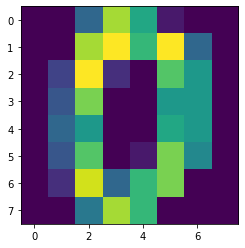

In [14]:
plt.imshow(X_digits[0].reshape((8, 8)))
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
print(X_train.shape, X_test.shape) # 25% 기본값

(1347, 64) (450, 64)


In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9711111111111111

In [26]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [27]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [28]:
param_grid = dict(kmeans__n_clusters = range(50, 99 + 1))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(50, 100)}, verbose=1)

In [29]:
grid_clf.best_params_

{'kmeans__n_clusters': 96}

In [30]:
grid_clf.score(X_test, y_test)

0.9688888888888889